可视化CIFAR-10数据集，了解数据特征

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
import numpy as np
import torchvision
import sys
import os
# sys.path.append(os.path.dirname(os.path.dirname(sys.path[0])))
from router import *
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 4.0)
# 十个类别
classes = ('plane','car','bird','cat','deer',
          'dog','frog','horse','ship','truck')

def imshow(img):
    img = img / 2 + 0.5 # 逆正则化
    np_img = img.numpy()  # tensor --> numpy
    plt.imshow(np.transpose(np_img,(1,2,0)))  # 改变通道顺序
    plt.show()

BATCH_SIZE = 32
    
# 随机获取一批数据
train_loader,_=dataloader(batchsize=BATCH_SIZE)
imgs,labs = next(iter(train_loader))

print(imgs.shape)
print(labs.shape)
    
#调用方法
imshow(torchvision.utils.make_grid(imgs))

# 输出这批图片对应的标签
print(' '.join('%5s' % classes[labs[i]] for i in range(BATCH_SIZE)))    

: 

CIFAR-10 实验可视化

example

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import router
import importlib
importlib.reload(router)

router.main(model_chosen='simp_ResNet9',max_epoch=3)

1.学习率策略

In [ ]:
import router
import importlib
importlib.reload(router)

router.main(model_chosen='simp_ResNet9',visualize=True,max_epoch=20,scheduler='CyclicLR',log_name='lr/CyclicLR')
router.main(model_chosen='simp_ResNet9',visualize=True,max_epoch=20,scheduler='OneCycleLR',log_name='lr/OneCycleLR')
router.main(model_chosen='simp_ResNet9',visualize=True,max_epoch=20,scheduler='Cos',log_name='lr/Cos')

2.激活层选择

In [ ]:
import router
import importlib
importlib.reload(router)


router.main(model_chosen='simp_ResNet9',visualize=True,max_epoch=20,log_name='act/ReLU',
                                            scheduler='CyclicLR',activation='ReLU')
router.main(model_chosen='simp_ResNet9',visualize=True,max_epoch=20,log_name='act/Mish',
                                            scheduler='CyclicLR',activation='Mish')
router.main(model_chosen='simp_ResNet9',visualize=True,max_epoch=20,log_name='act/ELU',
                                            scheduler='CyclicLR',activation='ELU')
router.main(model_chosen='simp_ResNet9',visualize=True,max_epoch=20,log_name='act/RReLU',
                                            scheduler='CyclicLR',activation='RReLU')
router.main(model_chosen='simp_ResNet9',visualize=True,max_epoch=20,log_name='act/GELU',
                                            scheduler='CyclicLR',activation='GELU')


3.数据增强

In [ ]:
import router
import importlib
importlib.reload(router)


'''
nohup python router.py main --model_chosen='simp_ResNet9' --visualize=True \
    --log_name='earse/use erase' --max_epoch=200 --scheduler='CyclicLR' --Erase=True > ue.log 2>&1 &
'''
# Totally Training Time Cost 4637.098792791367
# Best TrainAcc 96.760% , best TestAcc 93.270% 


'''
nohup python router.py main --model_chosen='simp_ResNet9' --visualize=True \
    --log_name='earse/no erase' --max_epoch=200 --scheduler='CyclicLR' > ne.log 2>&1 &
'''
# Totally Training Time Cost 4368.796500205994
# Best TrainAcc 99.988% , best TestAcc 92.780% 

4.loss landscape

数据集位置:  /remote-home/jiaxinghua/NNDL_PJ2

Load Time Cost: 6.148939609527588

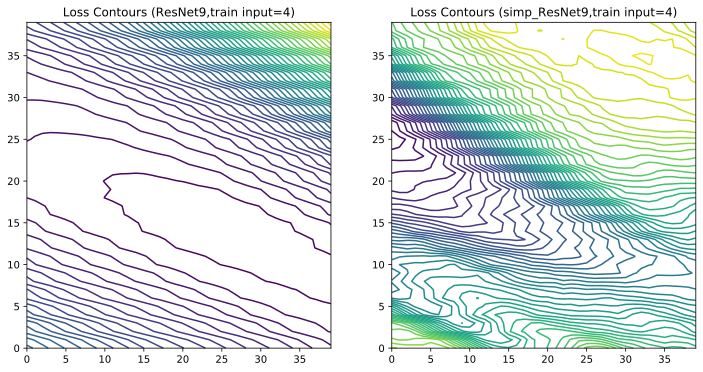

In [16]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
import numpy as np
import loss_landscapes
import loss_landscapes.metrics
import router
import sys
import pylab
pylab.rcParams['figure.figsize'] = [12,6]
STEPS = 40
trainloader,testloader=router.dataloader(download=False,batchsize=4)
x, y = iter(trainloader).__next__()
# model_final=router.load_model(router.simp_ResNet9(),'simp_ResNet9.pth')
model_final=router.load_model(router.ResNet9(),'ResNet9.pth')
criterion=router.CrossEntropyLoss()
metric = loss_landscapes.metrics.Loss(criterion, x, y)
loss_data_fin = loss_landscapes.random_plane(model_final, metric, 10, STEPS, normalization='filter', deepcopy_model=True)
plt.subplot(1, 2,1)
plt.contour(loss_data_fin, levels=50)
plt.title('Loss Contours (ResNet9,train input=4)')
# plt.show()

model_final=router.load_model(router.simp_ResNet9(),'simp_ResNet9.pth')
loss_data_fin = loss_landscapes.random_plane(model_final, metric, 10, STEPS, normalization='filter', deepcopy_model=True)
plt.subplot(1, 2,2)
plt.contour(loss_data_fin, levels=50)
plt.title('Loss Contours (simp_ResNet9,train input=4)')
plt.show()

5.网络insight

数据集位置:  /remote-home/jiaxinghua/NNDL_PJ2

Load Time Cost: 6.407807111740112

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


标签： frog


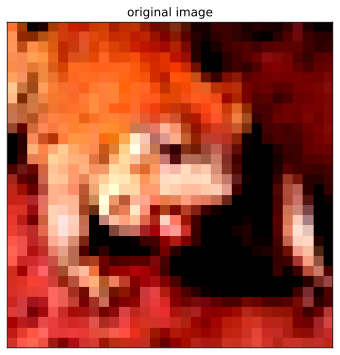

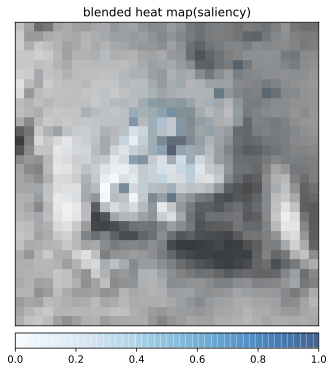

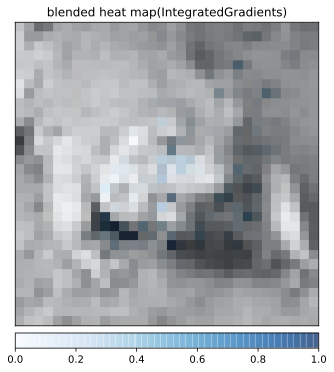

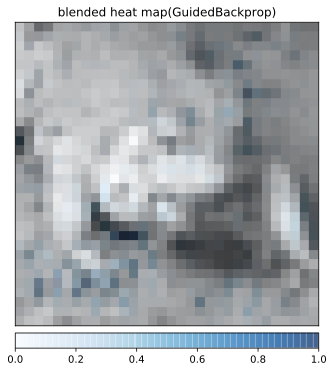

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


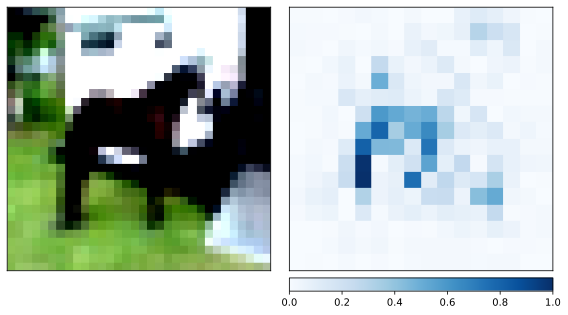

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


KeyError: 'heat_map'

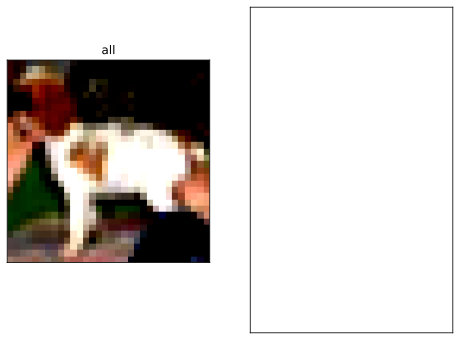

In [23]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import captum
import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision
import torchvision.transforms as transforms
import sys

from captum.attr import IntegratedGradients, Occlusion
from captum.attr import Saliency
from captum.attr import DeepLift
from captum.attr import NoiseTunnel
from captum.attr import GuidedBackprop, LayerActivation
from captum.attr import visualization as viz
import router
from Configs import device 

BATCH = 128
trainloader,testloader=router.dataloader(download=False,batchsize=BATCH)
model=router.load_model(router.ResNet9(inplace=False),'ResNet9.pth')
model.eval()

dataiter = iter(testloader)
images, labels = dataiter.next()
outputs = model(images)
_, predicted = torch.max(outputs, 1)
ind = 5
inputs = images[ind].unsqueeze(0)
inputs.requires_grad = True
classes = ('plane','car','bird','cat','deer',
          'dog','frog','horse','ship','truck')
print('标签：',classes[labels[ind]])

saliency = Saliency(model)
grads = saliency.attribute(inputs, target=labels[ind].item())
grads = np.transpose(grads.squeeze().cpu().detach().numpy(), (1, 2, 0))

original_image = np.transpose((images[ind].cpu().detach().numpy() / 2) + 0.5, (1, 2, 0))


_ = viz.visualize_image_attr(None, original_image, method="original_image",title="original image")


_ = viz.visualize_image_attr(grads, original_image, method="blended_heat_map",title= "blended heat map(saliency)",sign="absolute_value",show_colorbar=True)


ig = IntegratedGradients(model)
model.zero_grad()
attr_ig, delta = ig.attribute(inputs,target=labels[ind],baselines=inputs * 0, return_convergence_delta=True)
attr_ig = np.transpose(attr_ig.squeeze().cpu().detach().numpy(), (1, 2, 0))

_ = viz.visualize_image_attr(attr_ig, original_image, method="blended_heat_map",sign="absolute_value",show_colorbar=True,title= "blended heat map(IntegratedGradients)")


model.train()
gdp = GuidedBackprop(model)
attr_gdp = gdp.attribute(inputs, target=labels[ind])
attr_gdp = np.transpose(attr_gdp.squeeze().cpu().detach().numpy(), (1, 2, 0))
_ = viz.visualize_image_attr(attr_gdp, original_image, method="blended_heat_map",sign="absolute_value",show_colorbar=True,title= "blended heat map(GuidedBackprop)")


#换用一张图片探究occ的可视化
ind = 20
inputs = images[ind].unsqueeze(0)
original_image = np.transpose((images[ind].cpu().detach().numpy() / 2) + 0.5, (1, 2, 0))
inputs.requires_grad = True
model.eval()
occlusion = Occlusion(model)
attributions_occ = occlusion.attribute(inputs,
                                       strides = (2, 2, 2),
                                       target=labels[ind],
                                       sliding_window_shapes=(2,2, 2),
                                       baselines=0)
_ = viz.visualize_image_attr_multiple(np.transpose(attributions_occ.squeeze().cpu().detach().numpy(), (1,2,0)),
                                      original_image,
                                      ["original_image", "heat_map"],
                                      ["all", "absolute_value"],
                                      show_colorbar=True,
                                      outlier_perc=2,
)


ind = 12
inputs = images[ind].unsqueeze(0)
original_image = np.transpose((images[ind].cpu().detach().numpy() / 2) + 0.5, (1, 2, 0))
inputs.requires_grad = True
model.eval()
occlusion = Occlusion(model)
attributions_occ = occlusion.attribute(inputs,
                                       strides = (2, 2, 2),
                                       target=labels[ind],
                                       sliding_window_shapes=(2,2, 2),
                                       baselines=0)
_ = viz.visualize_image_attr_multiple(np.transpose(attributions_occ.squeeze().cpu().detach().numpy(), (1,2,0)),
                                      original_image,
                                      ["original_image", "heat_map"],
                                      ["original_image", "heat_map"],
                                      ["all", "absolute_value"],
                                      show_colorbar=True,
                                      outlier_perc=2,
)
